In [1]:
#predict: potential_total_value_of_award

In [3]:
#Need to remove NA Values
import pandas as pd

df = pd.read_csv("df.csv")
df = df.drop(columns=["current_total_value_of_award", "potential_total_value_of_award", "total_dollars_obligated", "total_outlayed_amount_for_overall_award"])

In [4]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_values_df[missing_values_df['Missing Values'] > 0])

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


X = df.drop(columns=['federal_action_obligation'])
y = df['federal_action_obligation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
gbm = GradientBoostingRegressor(random_state=42)
extra_trees = ExtraTreesRegressor(random_state=42)

models = [decision_tree, random_forest, gbm, extra_trees]
model_names = ['Decision Tree', 'Random Forest', 'GBM', 'Extra Trees']

model_list = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    model_list.append(model)
    print(f"{name} RMSE: {rmse}")

    # Display feature importances
    feature_importances = model.feature_importances_
    print(f"{name} Feature Importances:")
    for feat, importance in zip(X.columns, feature_importances):
        print(f"{feat}: {importance}")
    print("\n")


Decision Tree RMSE: 460441.0183244137
Decision Tree Feature Importances:
american_indian_owned_business: 0.011312157427099475
asian_pacific_american_owned_business: 0.008944157667442705
black_american_owned_business: 0.011253569478202196
c8a_program_participant: 0.14916491785873756
corporate_entity_tax_exempt: 0.00373092085683796
economically_disadvantaged_women_owned_small_business: 0.006059136740283422
emerging_small_business: 0.03704232421425648
for_profit_organization: 0.009155375992707104
foreign_owned: 0.0032799027891351976
hispanic_american_owned_business: 0.0127417931280883
minority_owned_business: 0.063192604203114
native_american_owned_business: 0.0169439866080773
native_hawaiian_organization_owned_firm: 0.0013851277845376472
nonprofit_organization: 0.0018857377306935534
other_minority_owned_business: 0.003980284283758488
partnership_or_limited_liability_partnership: 0.10245948556349445
self_certified_small_disadvantaged_business: 0.03366498041898383
service_disabled_veteran_

In [7]:

normalized_importances = np.zeros(len(X.columns))

for model in model_list:
    # Extract feature importances and normalize them
    importances = model.feature_importances_
    normalized = importances / np.sum(importances)  # Normalize so they sum to 1
    normalized_importances += normalized  # Accumulate normalized importances

# Average the accumulated normalized importances by dividing by the number of models
average_normalized_importances = normalized_importances / len(model_list)

# Create a DataFrame for easier visualization and interpretation
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Average Normalized Importance': average_normalized_importances
}).sort_values(by='Average Normalized Importance', ascending=False).reset_index(drop=True)

print(feature_importances_df)


                                              Feature  \
0                                                year   
1                             c8a_program_participant   
2        partnership_or_limited_liability_partnership   
3                        small_disadvantaged_business   
4                             minority_owned_business   
5   subcontinent_asian_asian_indian_american_owned...   
6                             emerging_small_business   
7         self_certified_small_disadvantaged_business   
8             service_disabled_veteran_owned_business   
9                                woman_owned_business   
10                     native_american_owned_business   
11                         women_owned_small_business   
12              asian_pacific_american_owned_business   
13                             veteran_owned_business   
14                   hispanic_american_owned_business   
15                            for_profit_organization   
16                     american

In [8]:
correlation_with_target = df.corr()['federal_action_obligation'].sort_values(ascending=False)
print(correlation_with_target)

federal_action_obligation                                  1.000000
year                                                       0.033338
service_disabled_veteran_owned_business                    0.013616
minority_owned_business                                    0.012383
for_profit_organization                                    0.011285
self_certified_small_disadvantaged_business                0.011204
native_american_owned_business                             0.010885
emerging_small_business                                    0.009424
veteran_owned_business                                     0.008409
partnership_or_limited_liability_partnership               0.007575
asian_pacific_american_owned_business                      0.007533
subcontinent_asian_asian_indian_american_owned_business    0.006791
hispanic_american_owned_business                           0.004888
c8a_program_participant                                    0.003120
american_indian_owned_business                  

In [9]:
df_2017_to_2020 = df[df['year'].isin([2017, 2018, 2019, 2020])]
df_2021_to_2024 = df[df['year'].isin([2021, 2022, 2023, 2024])]

correlation_with_target1 = df_2017_to_2020.corr()['federal_action_obligation'].sort_values(ascending=False)
print(correlation_with_target1)

correlation_with_target2 = df_2021_to_2024.corr()['federal_action_obligation'].sort_values(ascending=False)
print(correlation_with_target2)

federal_action_obligation                                  1.000000
native_american_owned_business                             0.036885
self_certified_small_disadvantaged_business                0.015424
minority_owned_business                                    0.015401
hispanic_american_owned_business                           0.013466
c8a_program_participant                                    0.010219
partnership_or_limited_liability_partnership               0.008635
for_profit_organization                                    0.006110
asian_pacific_american_owned_business                      0.005995
native_hawaiian_organization_owned_firm                    0.005151
american_indian_owned_business                             0.005037
service_disabled_veteran_owned_business                    0.004732
year                                                       0.003678
black_american_owned_business                              0.002055
other_minority_owned_business                   

In [45]:
df = pd.read_csv("df.csv")
df['federal_action_obligation'].corr(df['potential_total_value_of_award'])

0.005434400720089886

In [10]:
# Assuming correlation_with_target1 and correlation_with_target2 are pandas Series
# with indices as variable names and values as correlation coefficients

# Find variables with negative correlation in correlation_with_target1
negative_correlation_vars1 = correlation_with_target1[correlation_with_target1 < 0].index

# Find variables with negative correlation in correlation_with_target2
negative_correlation_vars2 = correlation_with_target2[correlation_with_target2 < 0].index

# Identify variables that are negative in both lists
negative_in_both = set(negative_correlation_vars1).intersection(set(negative_correlation_vars2))

# Convert the set back to list if needed, or directly print or work with the set
negative_in_both = list(negative_in_both)

print("Variables with negative correlation in both datasets:", negative_in_both)


Variables with negative correlation in both datasets: ['women_owned_small_business', 'foreign_owned', 'veteran_owned_business', 'corporate_entity_tax_exempt', 'woman_owned_business', 'nonprofit_organization', 'economically_disadvantaged_women_owned_small_business', 'sole_proprietorship']


In [12]:
# Assuming correlation_with_target1 and correlation_with_target2 are pandas Series
# with indices as variable names and values as correlation coefficients

# Find variables with negative correlation in correlation_with_target1
negative_correlation_vars1 = set(correlation_with_target1[correlation_with_target1 < 0].index)

# Find variables with negative correlation in correlation_with_target2
negative_correlation_vars2 = set(correlation_with_target2[correlation_with_target2 < 0].index)

# Identify variables that are negative in one list but not in both
negative_exclusive_to_1 = negative_correlation_vars1 - negative_correlation_vars2
print(negative_exclusive_to_1)
negative_exclusive_to_2 = negative_correlation_vars2 - negative_correlation_vars1
print(negative_exclusive_to_2)
# Combine the two sets to get variables that are negative in one but not both
negative_in_one_not_both = negative_exclusive_to_1.union(negative_exclusive_to_2)

# Convert the set back to list if needed
negative_in_one_not_both = list(negative_in_one_not_both)

print("Variables with negative correlation in one dataset but not both:", negative_in_one_not_both)


{'small_disadvantaged_business', 'subcontinent_asian_asian_indian_american_owned_business'}
{'other_minority_owned_business', 'service_disabled_veteran_owned_business', 'emerging_small_business', 'american_indian_owned_business', 'native_hawaiian_organization_owned_firm', 'hispanic_american_owned_business'}
Variables with negative correlation in one dataset but not both: ['other_minority_owned_business', 'service_disabled_veteran_owned_business', 'emerging_small_business', 'american_indian_owned_business', 'small_disadvantaged_business', 'subcontinent_asian_asian_indian_american_owned_business', 'native_hawaiian_organization_owned_firm', 'hispanic_american_owned_business']


In [17]:
print(df_2017_to_2020["federal_action_obligation"].mean()-df_2021_to_2024["federal_action_obligation"].mean())

-27762.457989742674


<Figure size 1000x600 with 0 Axes>

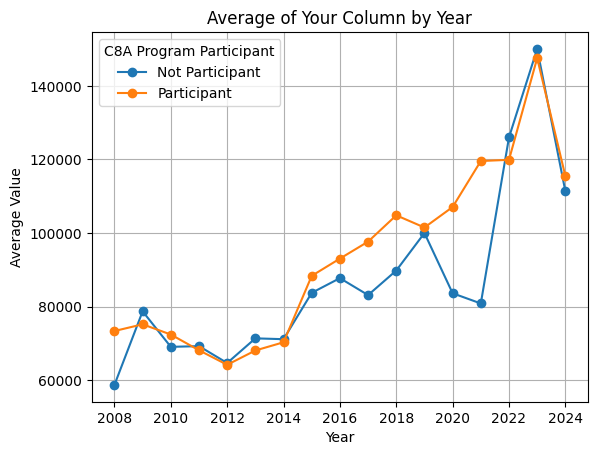

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'your_column' is the column you want to average
# Step 2: Group and aggregate the data
grouped_df = df.groupby(['year', 'c8a_program_participant'])['federal_action_obligation'].mean().unstack()

# Step 3: Plot the data
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='line', marker='o')
plt.title('Average of Your Column by Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(title='C8A Program Participant', labels=['Not Participant', 'Participant'])
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

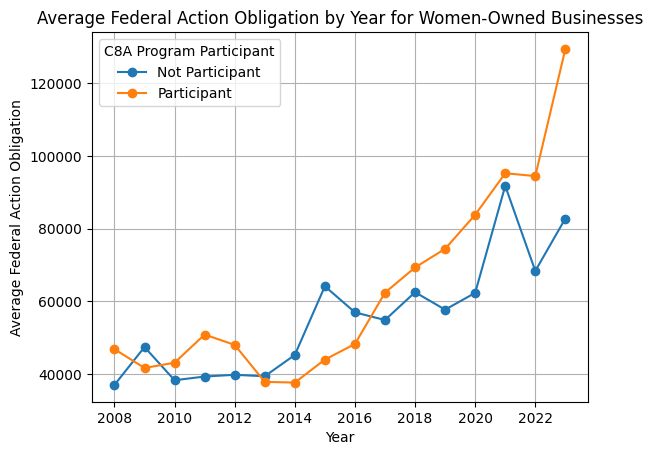

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for women-owned entries
df_women = df[df['woman_owned_business'] == 1]

df_women = df_women[df_women['year'] != 2024]

# Assuming 'federal_action_obligation' is the column you want to average
# Group and aggregate the data
grouped_df = df_women.groupby(['year', 'c8a_program_participant'])['federal_action_obligation'].mean().unstack()



# Plot the data
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='line', marker='o')
plt.title('Average Federal Action Obligation by Year for Women-Owned Businesses')
plt.xlabel('Year')
plt.ylabel('Average Federal Action Obligation')
plt.legend(title='C8A Program Participant', labels=['Not Participant', 'Participant'])
plt.grid(True)
plt.show()

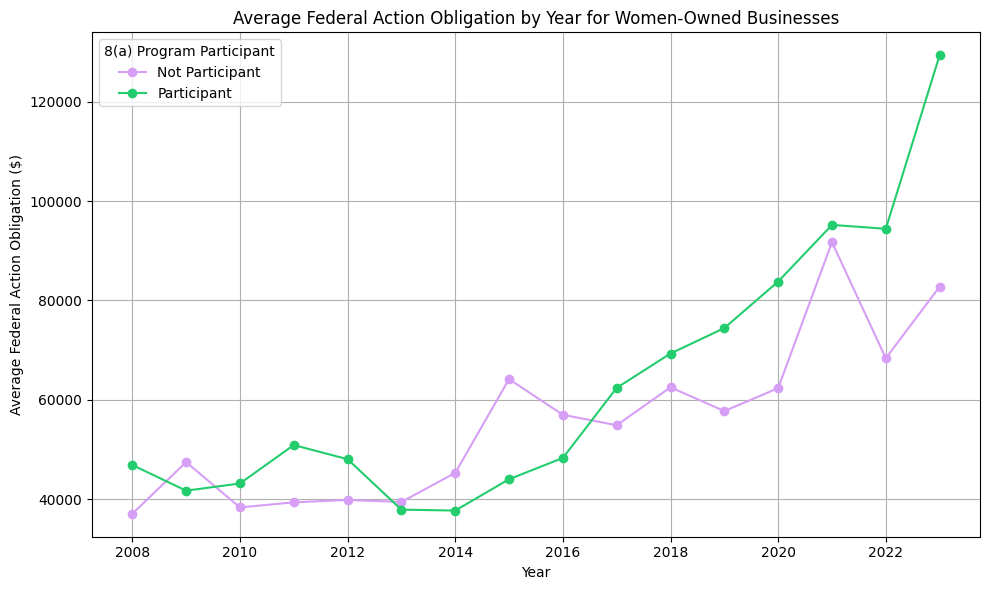

In [11]:
df_women = df[(df['woman_owned_business'] == 1) & (df['year'] != 2024)]

# Group and aggregate data by year and c8a program participation
grouped_df = df_women.groupby(['year', 'c8a_program_participant'])['federal_action_obligation'].mean().unstack()

# Plotting
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='line', marker='o', color=['#D69EF4', '#23CD6D'], ax=plt.gca())
plt.title('Average Federal Action Obligation by Year for Women-Owned Businesses')
plt.xlabel('Year')
plt.ylabel('Average Federal Action Obligation ($)')
plt.legend(title='8(a) Program Participant', labels=['Not Participant', 'Participant'])
plt.grid(True)
plt.tight_layout()

plt.show()

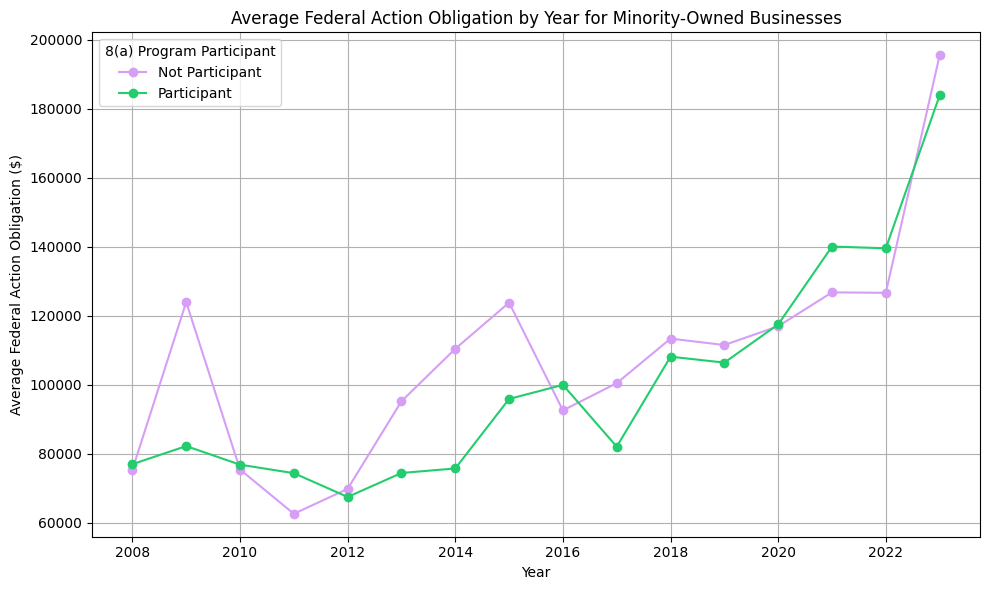

In [13]:
df_minority = df[(df['minority_owned_business'] == 1) & (df['year'] != 2024)]

# Group and aggregate data by year and c8a program participation
grouped_df = df_minority.groupby(['year', 'c8a_program_participant'])['federal_action_obligation'].mean().unstack()

# Plotting
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='line', marker='o', color=['#D69EF4', '#23CD6D'], ax=plt.gca())
plt.title('Average Federal Action Obligation by Year for Minority-Owned Businesses')
plt.xlabel('Year')
plt.ylabel('Average Federal Action Obligation ($)')
plt.legend(title='8(a) Program Participant', labels=['Not Participant', 'Participant'])
plt.grid(True)
plt.tight_layout()

plt.show()

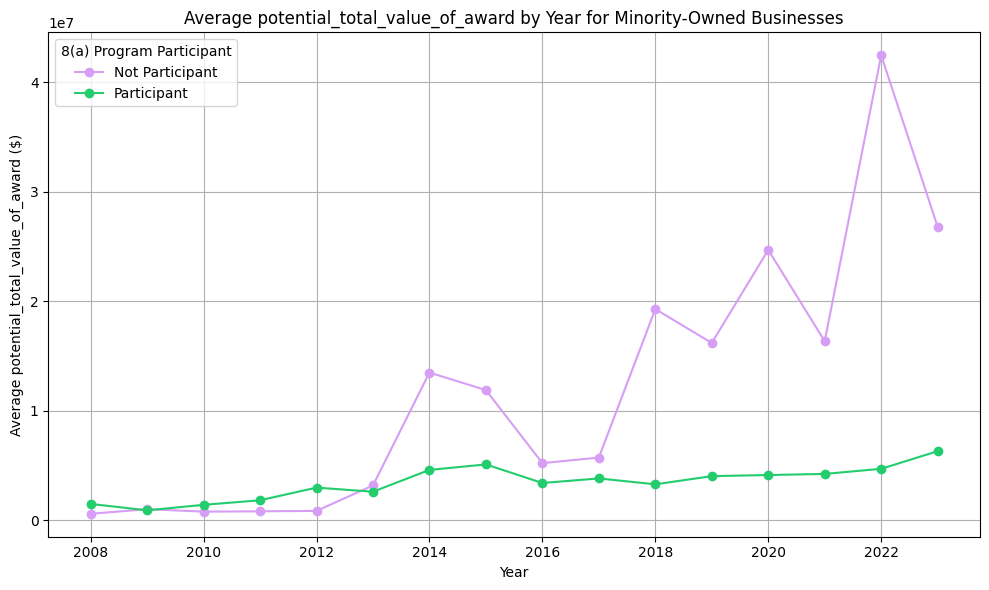

In [40]:
df_minority = df[(df['minority_owned_business'] == 1) & (df['year'] != 2024)]

# Group and aggregate data by year and c8a program participation
grouped_df = df_minority.groupby(['year', 'c8a_program_participant'])['potential_total_value_of_award'].mean().unstack()

# Plotting
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='line', marker='o', color=['#D69EF4', '#23CD6D'], ax=plt.gca())
plt.title('Average potential_total_value_of_award by Year for Minority-Owned Businesses')
plt.xlabel('Year')
plt.ylabel('Average potential_total_value_of_award ($)')
plt.legend(title='8(a) Program Participant', labels=['Not Participant', 'Participant'])
plt.grid(True)
plt.tight_layout()

plt.show()

<Figure size 1000x600 with 0 Axes>

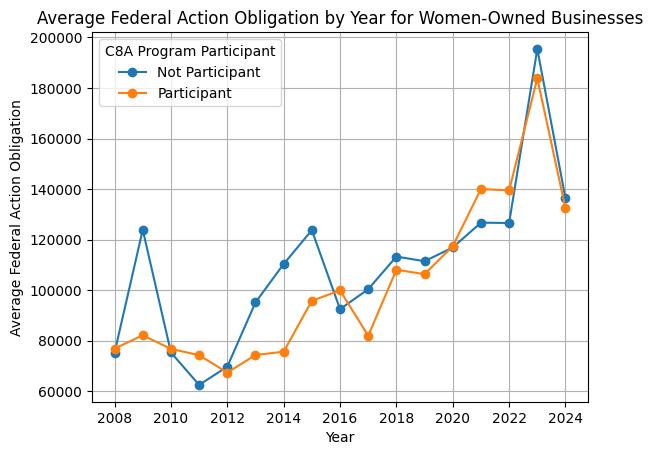

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for women-owned entries
df_women = df[df['minority_owned_business'] == 1]

# Assuming 'federal_action_obligation' is the column you want to average
# Group and aggregate the data
grouped_df = df_women.groupby(['year', 'c8a_program_participant'])['federal_action_obligation'].mean().unstack()

# Plot the data
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='line', marker='o')
plt.title('Average Federal Action Obligation by Year for Women-Owned Businesses')
plt.xlabel('Year')
plt.ylabel('Average Federal Action Obligation')
plt.legend(title='C8A Program Participant', labels=['Not Participant', 'Participant'])
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

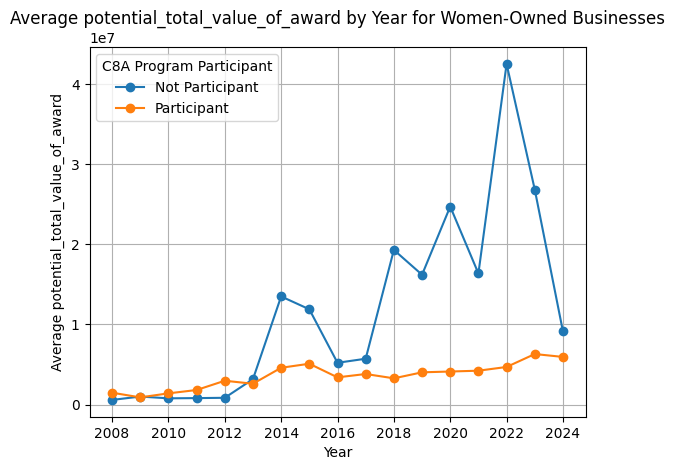

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for women-owned entries
df_women = df[df['minority_owned_business'] == 1]

# Assuming 'federal_action_obligation' is the column you want to average
# Group and aggregate the data
grouped_df = df_women.groupby(['year', 'c8a_program_participant'])['potential_total_value_of_award'].mean().unstack()

# Plot the data
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='line', marker='o')
plt.title('Average potential_total_value_of_award by Year for Women-Owned Businesses')
plt.xlabel('Year')
plt.ylabel('Average potential_total_value_of_award')
plt.legend(title='C8A Program Participant', labels=['Not Participant', 'Participant'])
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

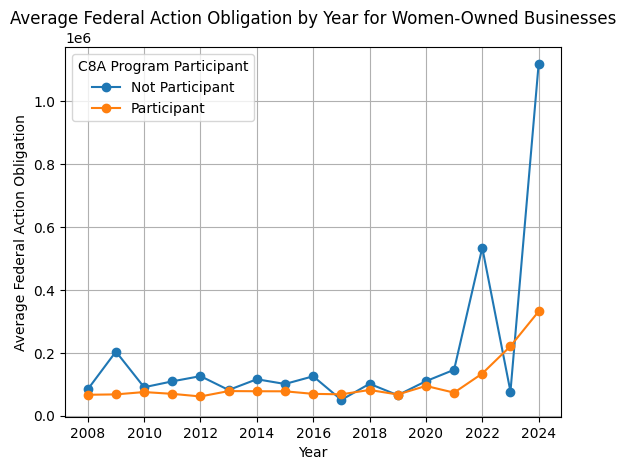

In [33]:
#small_disadvantaged_business

df_women = df[df['small_disadvantaged_business'] == 1]

# Assuming 'federal_action_obligation' is the column you want to average
# Group and aggregate the data
grouped_df = df_women.groupby(['year', 'c8a_program_participant'])['federal_action_obligation'].mean().unstack()

# Plot the data
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='line', marker='o')
plt.title('Average Federal Action Obligation by Year for Women-Owned Businesses')
plt.xlabel('Year')
plt.ylabel('Average Federal Action Obligation')
plt.legend(title='C8A Program Participant', labels=['Not Participant', 'Participant'])
plt.grid(True)
plt.show()

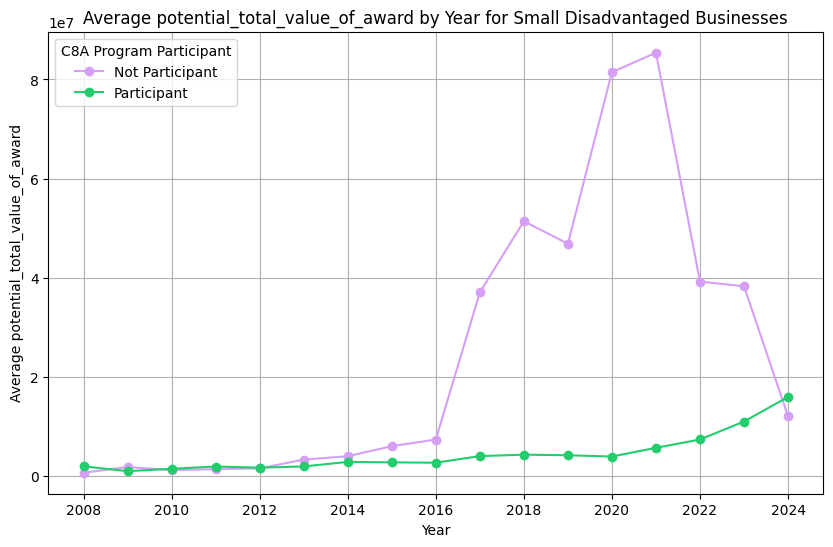

In [43]:
#small_disadvantaged_business

df_women = df[df['small_disadvantaged_business'] == 1]

# Assuming 'federal_action_obligation' is the column you want to average
# Group and aggregate the data
grouped_df = df_women.groupby(['year', 'c8a_program_participant'])['potential_total_value_of_award'].mean().unstack()

# Plot the data
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='line', marker='o', color=['#D69EF4', '#23CD6D'], ax=plt.gca())
plt.title('Average potential_total_value_of_award by Year for Small Disadvantaged Businesses')
plt.xlabel('Year')
plt.ylabel('Average potential_total_value_of_award')
plt.legend(title='C8A Program Participant', labels=['Not Participant', 'Participant'])
plt.grid(True)
plt.show()

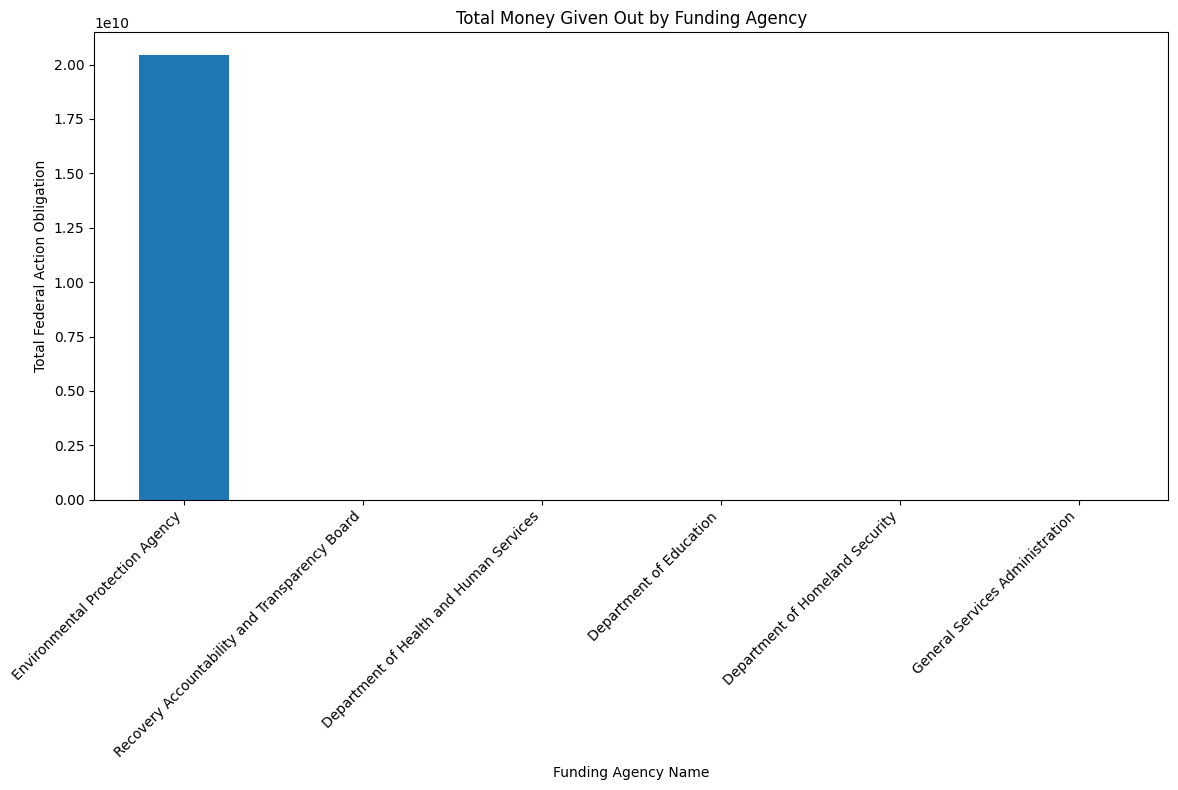

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df_extra = pd.read_csv("final_dataset.csv")

# Step 1 & 2: Group by 'funding_agency_name' and sum 'federal_action_obligation'
total_funding_by_agency = df_extra.groupby('funding_agency_name')['federal_action_obligation'].sum()

# Sort values for better visualization, if desired
total_funding_by_agency = total_funding_by_agency.sort_values(ascending=False)

# Step 3: Plot the data
plt.figure(figsize=(12, 8))
total_funding_by_agency.plot(kind='bar')
plt.title('Total Money Given Out by Funding Agency')
plt.xlabel('Funding Agency Name')
plt.ylabel('Total Federal Action Obligation')
plt.xticks(rotation=45, ha='right') # Rotate labels to avoid overlap
plt.tight_layout() # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [37]:
df_full = pd.read_csv("df.csv")

# Group by 'year' and then count null values in 'potential_total_value_of_award' for each group
null_values_by_year = df_full.groupby('year')['potential_total_value_of_award'].apply(lambda x: x.isnull().sum())

null_values_by_year

year
2008    22128
2009    21822
2010    23187
2011    25572
2012    21755
2013    18648
2014    16457
2015    14770
2016    13119
2017    10112
2018        0
2019        0
2020        0
2021        0
2022        0
2023        0
2024        0
Name: potential_total_value_of_award, dtype: int64

In [34]:
df2023 = pd.read_csv("FY2023_068_Contracts_Full_20240214_1.csv")

df2023['potential_total_value_of_award'].isnull().sum()

<ipython-input-34-92bde388e65d>:1: DtypeWarning: Columns (47,52,68,81,164,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df2023 = pd.read_csv("FY2023_068_Contracts_Full_20240214_1.csv")


0

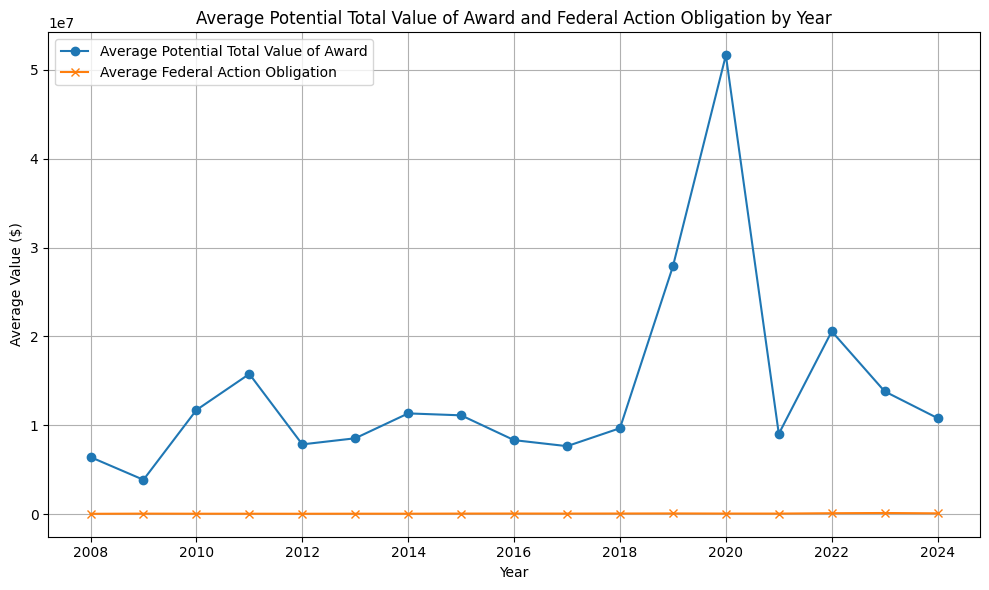

In [38]:
df = pd.read_csv("df.csv")
average_values = df.groupby('year').agg({
    'potential_total_value_of_award': 'mean',
    'federal_action_obligation': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_values['year'], average_values['potential_total_value_of_award'], label='Average Potential Total Value of Award', marker='o')
plt.plot(average_values['year'], average_values['federal_action_obligation'], label='Average Federal Action Obligation', marker='x')

plt.title('Average Potential Total Value of Award and Federal Action Obligation by Year')
plt.xlabel('Year')
plt.ylabel('Average Value ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

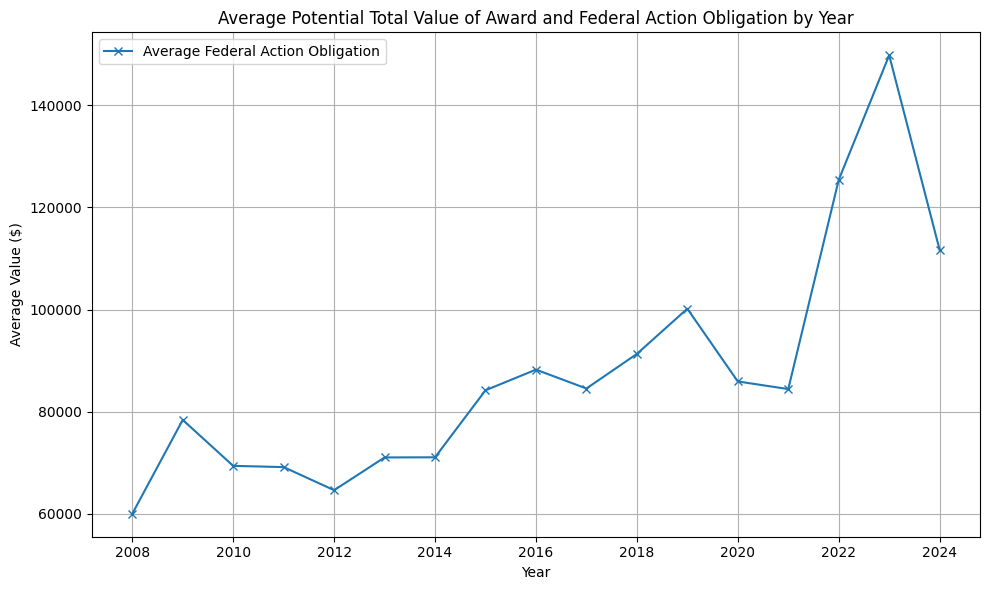

In [39]:
df = pd.read_csv("df.csv")
average_values = df.groupby('year').agg({
    'potential_total_value_of_award': 'mean',
    'federal_action_obligation': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(average_values['year'], average_values['potential_total_value_of_award'], label='Average Potential Total Value of Award', marker='o')
plt.plot(average_values['year'], average_values['federal_action_obligation'], label='Average Federal Action Obligation', marker='x')

plt.title('Average Potential Total Value of Award and Federal Action Obligation by Year')
plt.xlabel('Year')
plt.ylabel('Average Value ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()